# Basic Setup and Data Loading

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [78]:
supplemental = pd.read_csv("../Data/supplemental_clinical_data.csv")
supplemental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2223 non-null   object 
 1   patient_id                           2223 non-null   int64  
 2   visit_month                          2223 non-null   int64  
 3   updrs_1                              2010 non-null   float64
 4   updrs_2                              2009 non-null   float64
 5   updrs_3                              2218 non-null   float64
 6   updrs_4                              1295 non-null   float64
 7   upd23b_clinical_state_on_medication  1122 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 139.1+ KB


In [79]:
supplemental.shape

(2223, 8)

In [80]:
supplemental.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN


In [81]:
supplemental.describe

<bound method NDFrame.describe of       visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0         35_0          35            0      5.0      3.0     16.0      0.0   
1        35_36          35           36      6.0      4.0     20.0      0.0   
2         75_0          75            0      4.0      6.0     26.0      0.0   
3        75_36          75           36      1.0      8.0     38.0      0.0   
4        155_0         155            0      NaN      NaN      0.0      NaN   
...        ...         ...          ...      ...      ...      ...      ...   
2218   65382_0       65382            0      NaN      NaN      0.0      NaN   
2219   65405_0       65405            0      5.0     16.0     31.0      0.0   
2220   65405_5       65405            5      NaN      NaN     57.0      NaN   
2221   65530_0       65530            0     10.0      6.0     24.0      0.0   
2222  65530_36       65530           36      8.0      4.0     15.0      4.0   

     upd23b_clini

In [82]:
supplemental.dtypes

visit_id                                object
patient_id                               int64
visit_month                              int64
updrs_1                                float64
updrs_2                                float64
updrs_3                                float64
updrs_4                                float64
upd23b_clinical_state_on_medication     object
dtype: object

In [83]:
supplemental.columns

Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'],
      dtype='object')

In [84]:
supplemental.drop(columns = ['upd23b_clinical_state_on_medication'], inplace = True)

In [85]:
supplemental.duplicated().sum()

np.int64(0)

In [86]:
supplemental.duplicated(subset = ['visit_id']).sum()

np.int64(0)

In [87]:
supplemental.isna().sum()

visit_id         0
patient_id       0
visit_month      0
updrs_1        213
updrs_2        214
updrs_3          5
updrs_4        928
dtype: int64

In [88]:
supplemental.shape

(2223, 7)

In [89]:
supplemental['visit_month'].value_counts()

visit_month
0     771
36    258
6     248
12    235
30    223
24    194
18    176
5     118
Name: count, dtype: int64

In [90]:
supplemental.columns

Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4'],
      dtype='object')

## UPDRS1

In [91]:
supplemental_updrs1_prelim = supplemental[[ 'patient_id', 'visit_month', 'updrs_1' ]].copy()

In [92]:
supplemental_updrs1 = supplemental_updrs1_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_1' )

In [93]:
supplemental_updrs1.columns

Index([0, 5, 6, 12, 18, 24, 30, 36], dtype='int64', name='visit_month')

In [94]:
supplemental_updrs1.head()

visit_month,0,5,6,12,18,24,30,36
patient_id,,,,,,,,
35,5.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
75,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,5.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
527,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [95]:
supplemental_updrs1.shape

(771, 8)

In [96]:
supplemental_updrs1.isna().sum()

visit_month
0      95
5     771
6     523
12    536
18    595
24    577
30    548
36    513
dtype: int64

In [97]:
supplemental_updrs1.drop(columns = [5], inplace = True)

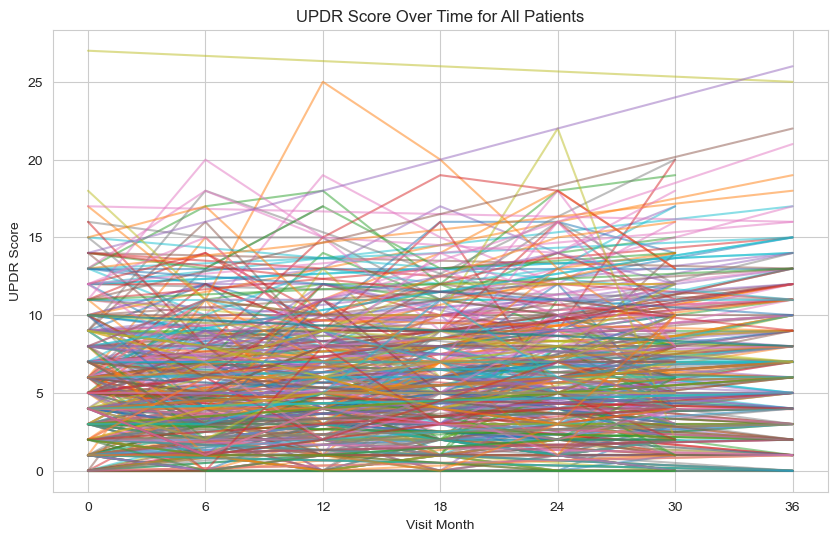

In [98]:
plt.figure(figsize=(10, 6))

for patient_id, row in supplemental_updrs1.iterrows():
    values = row.dropna()
    months =  values.index 
    plt.plot(months, values.values,  alpha=0.5)

plt.xlabel('Visit Month')
plt.ylabel('UPDR Score')
plt.title('UPDR Score Over Time for All Patients')
plt.xticks(supplemental_updrs1.columns)  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()


In [99]:
binary_matrix = supplemental_updrs1[supplemental_updrs1.columns].notna().astype(int)
binary_matrix.shape


(771, 7)

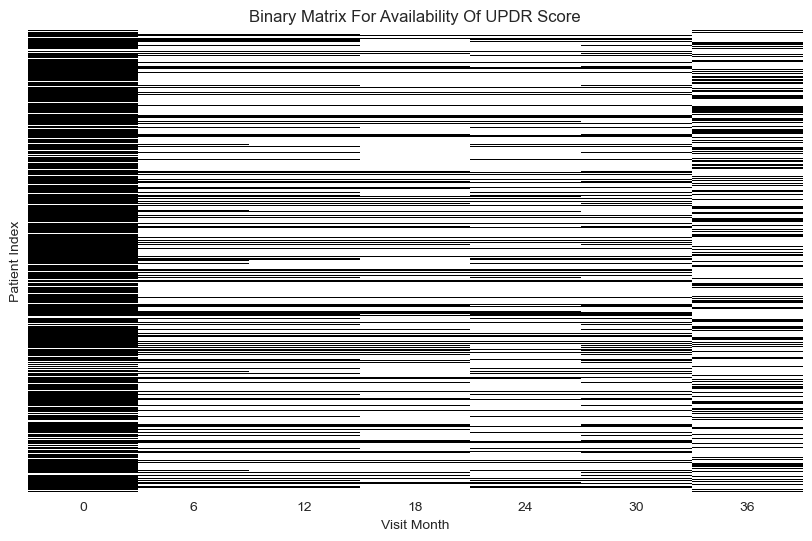

In [100]:
plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix, cmap='Greys', cbar=False)
plt.xlabel('Visit Month')
plt.ylabel('Patient Index')
plt.title('Binary Matrix For Availability Of UPDR Score')
plt.yticks([],[])  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()

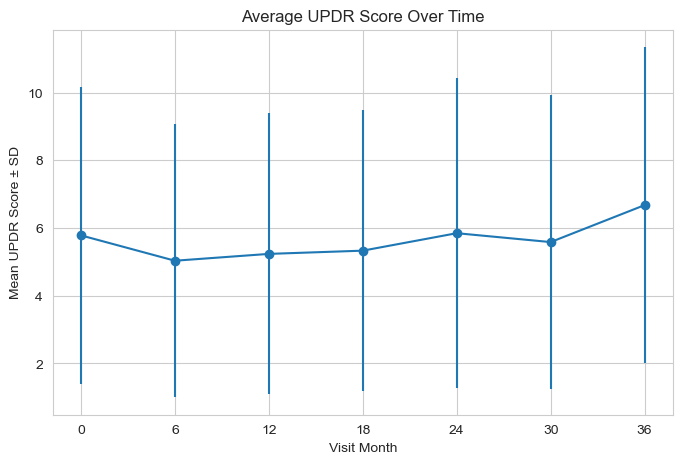

In [101]:
mean_updr_1_score = supplemental_updrs1.mean()
std_updr_1_score = supplemental_updrs1.std()
median_updr_1_score = supplemental_updrs1.median()
visit_months = supplemental_updrs1.columns
plt.figure(figsize=(8, 5))
plt.errorbar(visit_months, mean_updr_1_score, yerr =std_updr_1_score, fmt='-o')
plt.title("Average UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Mean UPDR Score ± SD")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

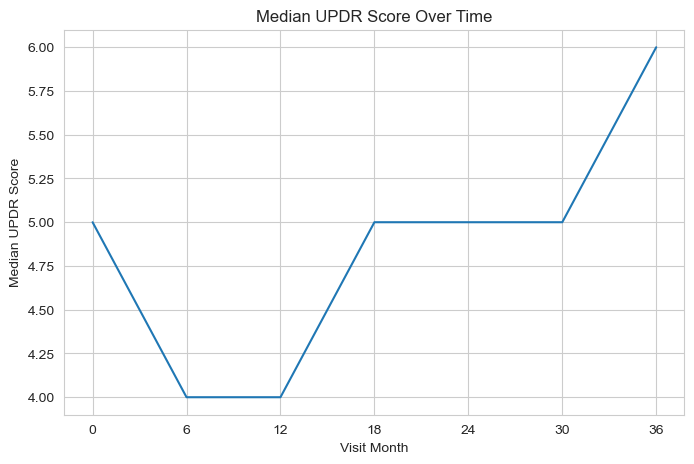

In [102]:
median_updr_1_score = supplemental_updrs1.median()
plt.figure(figsize=(8, 5))
plt.plot(visit_months, median_updr_1_score )
plt.title("Median UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Median UPDR Score")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

In [103]:
summary = supplemental_updrs1.describe().T
print(summary)

             count      mean       std  min  25%  50%  75%   max
visit_month                                                     
0            676.0  5.781065  4.391507  0.0  3.0  5.0  8.0  27.0
6            248.0  5.032258  4.031125  0.0  2.0  4.0  7.0  20.0
12           235.0  5.234043  4.147972  0.0  2.0  4.0  7.0  25.0
18           176.0  5.329545  4.157531  0.0  2.0  5.0  7.0  20.0
24           194.0  5.845361  4.574859  0.0  2.0  5.0  8.0  22.0
30           223.0  5.582960  4.328938  0.0  2.0  5.0  8.0  20.0
36           258.0  6.674419  4.663231  0.0  3.0  6.0  9.0  26.0


## UPDRS2

In [104]:
supplemental_updrs2_prelim = supplemental[[ 'patient_id', 'visit_month', 'updrs_2' ]].copy()

In [105]:
supplemental_updrs2 = supplemental_updrs2_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_2' )

In [106]:
supplemental_updrs2.columns

Index([0, 5, 6, 12, 18, 24, 30, 36], dtype='int64', name='visit_month')

In [107]:
supplemental_updrs2.head()

visit_month,0,5,6,12,18,24,30,36
patient_id,,,,,,,,
35,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
75,6.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,7.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0
527,2.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [108]:
supplemental_updrs2.shape

(771, 8)

In [109]:
supplemental_updrs2.isna().sum()

visit_month
0      95
5     771
6     523
12    536
18    595
24    577
30    549
36    513
dtype: int64

In [110]:
supplemental_updrs2.drop(columns = [5], inplace = True)

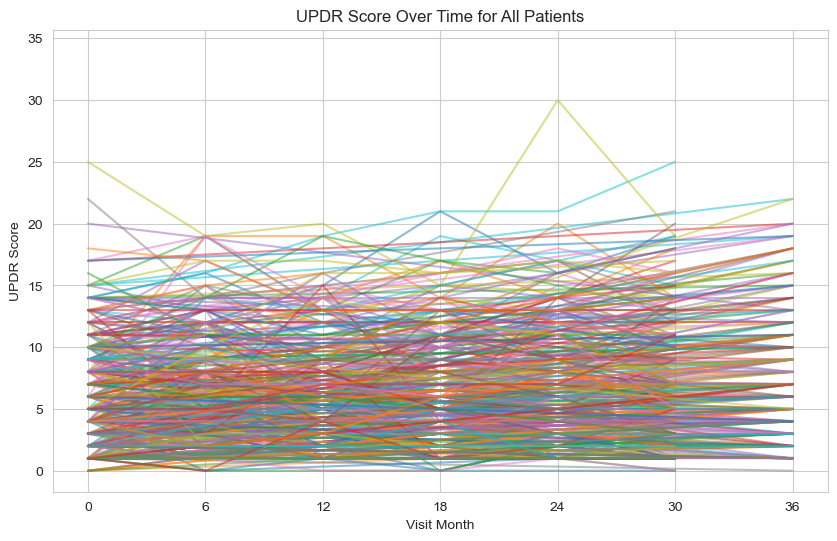

In [111]:
plt.figure(figsize=(10, 6))

for patient_id, row in supplemental_updrs2.iterrows():
    values = row.dropna()
    months =  values.index 
    plt.plot(months, values.values,  alpha=0.5)

plt.xlabel('Visit Month')
plt.ylabel('UPDR Score')
plt.title('UPDR Score Over Time for All Patients')
plt.xticks(supplemental_updrs2.columns)  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()


In [112]:
binary_matrix2 = supplemental_updrs2[supplemental_updrs2.columns].notna().astype(int)
binary_matrix2.shape


(771, 7)

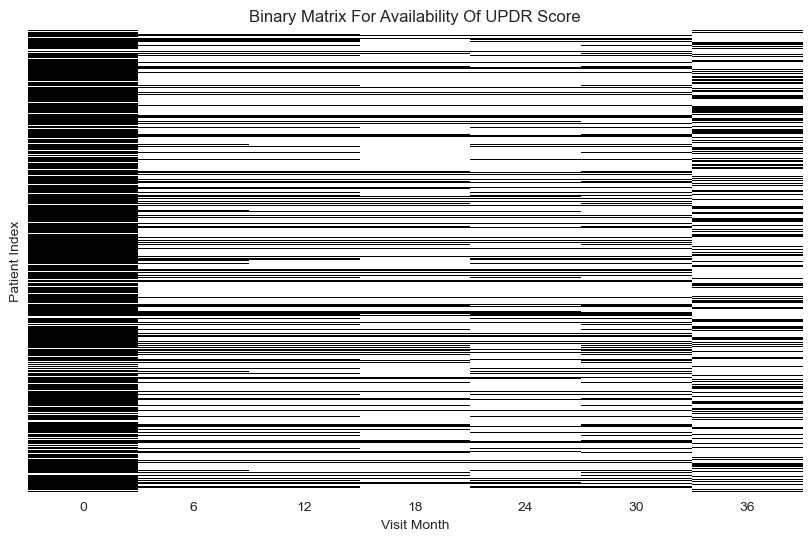

In [113]:
plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix2, cmap='Greys', cbar=False)
plt.xlabel('Visit Month')
plt.ylabel('Patient Index')
plt.title('Binary Matrix For Availability Of UPDR Score')
plt.yticks([],[])  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()

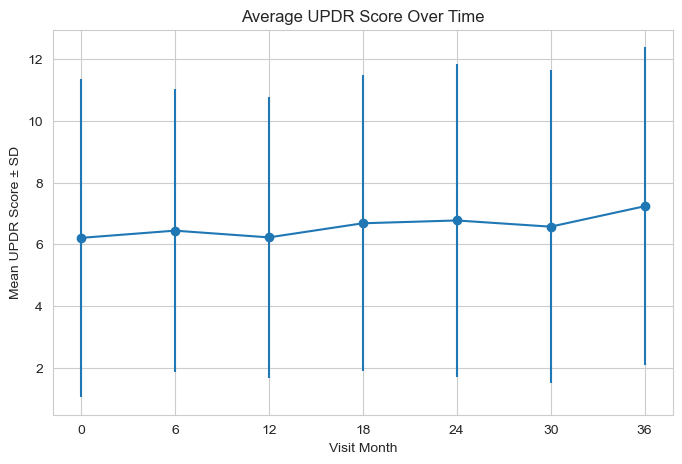

In [114]:
mean_updr_2_score = supplemental_updrs2.mean()
std_updr_2_score = supplemental_updrs2.std()
median_updr_2_score = supplemental_updrs2.median()
visit_months = supplemental_updrs2.columns
plt.figure(figsize=(8, 5))
plt.errorbar(visit_months, mean_updr_2_score, yerr =std_updr_2_score, fmt='-o')
plt.title("Average UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Mean UPDR Score ± SD")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

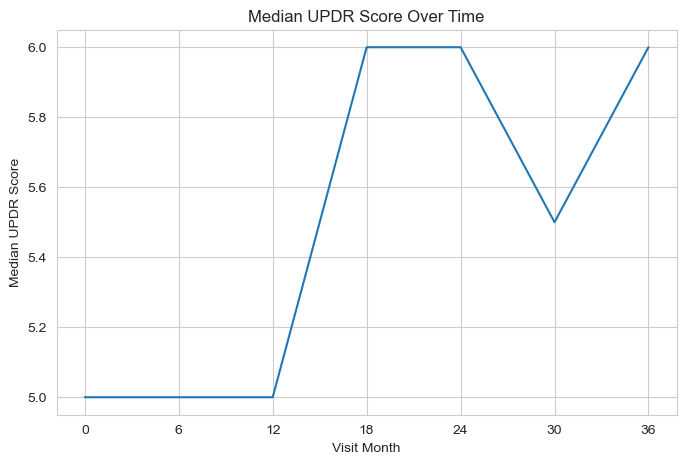

In [115]:
median_updr_2_score = supplemental_updrs2.median()
plt.figure(figsize=(8, 5))
plt.plot(visit_months, median_updr_2_score )
plt.title("Median UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Median UPDR Score")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

In [116]:
summary = supplemental_updrs2.describe().T
print(summary)

             count      mean       std  min   25%  50%    75%   max
visit_month                                                        
0            676.0  6.210059  5.152802  0.0  2.00  5.0   9.00  34.0
6            248.0  6.443548  4.581785  0.0  3.00  5.0   9.25  19.0
12           235.0  6.225532  4.539027  0.0  3.00  5.0   9.00  20.0
18           176.0  6.681818  4.784607  0.0  3.00  6.0  10.00  21.0
24           194.0  6.773196  5.050020  1.0  2.25  6.0  10.75  30.0
30           222.0  6.572072  5.067127  0.0  2.25  5.5   9.75  25.0
36           258.0  7.232558  5.142350  0.0  3.00  6.0  10.00  22.0


## UPDRS3

In [117]:
supplemental_updrs3_prelim = supplemental[[ 'patient_id', 'visit_month', 'updrs_3' ]].copy()

In [118]:
supplemental_updrs3 = supplemental_updrs3_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_3' )

In [119]:
supplemental_updrs3.columns

Index([0, 5, 6, 12, 18, 24, 30, 36], dtype='int64', name='visit_month')

In [120]:
supplemental_updrs3.head()

visit_month,0,5,6,12,18,24,30,36
patient_id,,,,,,,,
35,16.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0
75,26.0,NaN,NaN,NaN,NaN,NaN,NaN,38.0
155,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,6.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
527,9.0,NaN,NaN,NaN,NaN,NaN,NaN,22.0


In [121]:
supplemental_updrs3.shape

(771, 8)

In [122]:
supplemental_updrs3.isna().sum()

visit_month
0       2
5     653
6     524
12    536
18    595
24    577
30    549
36    514
dtype: int64

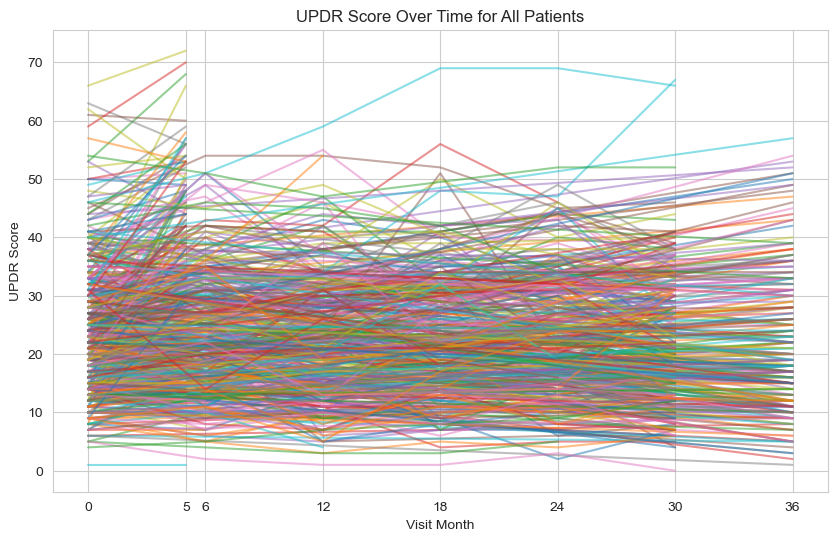

In [123]:
plt.figure(figsize=(10, 6))

for patient_id, row in supplemental_updrs3.iterrows():
    values = row.dropna()
    months =  values.index 
    plt.plot(months, values.values,  alpha=0.5)

plt.xlabel('Visit Month')
plt.ylabel('UPDR Score')
plt.title('UPDR Score Over Time for All Patients')
plt.xticks(supplemental_updrs3.columns)  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()


In [124]:
binary_matrix3 = supplemental_updrs3[supplemental_updrs3.columns].notna().astype(int)
binary_matrix3.shape


(771, 8)

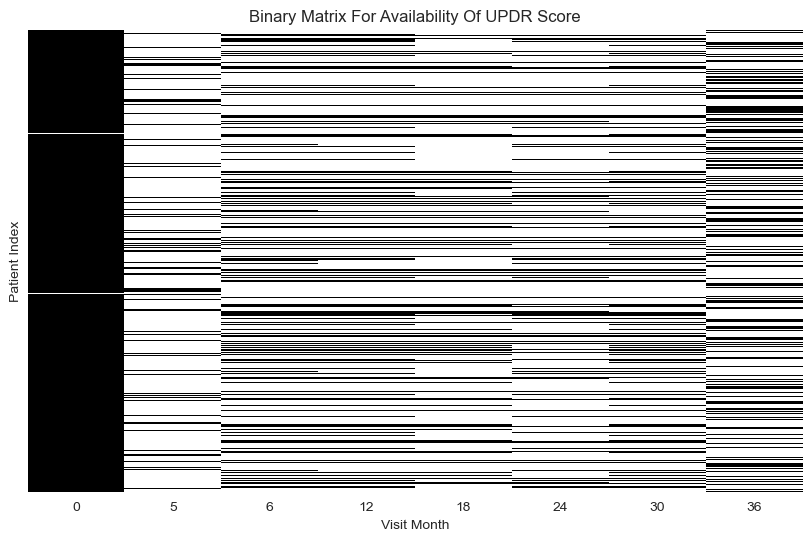

In [125]:
plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix3, cmap='Greys', cbar=False)
plt.xlabel('Visit Month')
plt.ylabel('Patient Index')
plt.title('Binary Matrix For Availability Of UPDR Score')
plt.yticks([],[])  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()

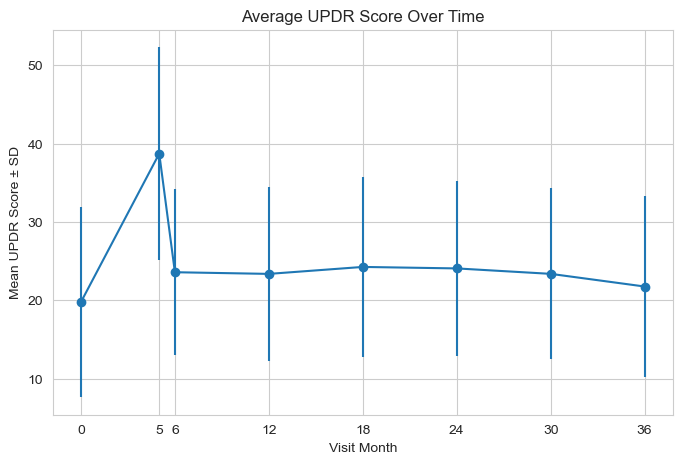

In [126]:
mean_updr_3_score = supplemental_updrs3.mean()
std_updr_3_score = supplemental_updrs3.std()
median_updr_3_score = supplemental_updrs3.median()
visit_months = supplemental_updrs3.columns
plt.figure(figsize=(8, 5))
plt.errorbar(visit_months, mean_updr_3_score, yerr =std_updr_3_score, fmt='-o')
plt.title("Average UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Mean UPDR Score ± SD")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

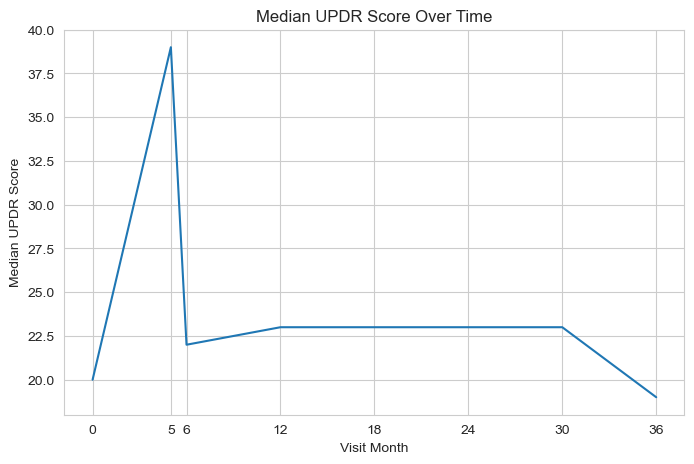

In [127]:
median_updr_2_score = supplemental_updrs3.median()
plt.figure(figsize=(8, 5))
plt.plot(visit_months, median_updr_3_score )
plt.title("Median UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Median UPDR Score")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

In [128]:
summary = supplemental_updrs3.describe().T
print(summary)

             count       mean        std  min   25%   50%   75%   max
visit_month                                                          
0            769.0  19.782835  12.150571  0.0  12.0  20.0  27.0  66.0
5            118.0  38.737288  13.580673  1.0  29.0  39.0  49.0  72.0
6            247.0  23.591093  10.629324  2.0  15.5  22.0  31.0  54.0
12           235.0  23.378723  11.143066  1.0  15.0  23.0  31.0  59.0
18           176.0  24.267045  11.438893  1.0  16.0  23.0  32.0  69.0
24           194.0  24.077320  11.218009  2.0  15.0  23.0  32.0  69.0
30           222.0  23.382883  10.921865  0.0  15.0  23.0  31.0  67.0
36           257.0  21.766537  11.550837  1.0  13.0  19.0  29.0  57.0


## UPDRS4

In [129]:
supplemental_updrs4_prelim = supplemental[[ 'patient_id', 'visit_month', 'updrs_4' ]].copy()

In [130]:
supplemental_updrs4 = supplemental_updrs4_prelim.pivot(index = 'patient_id', columns = 'visit_month', values = 'updrs_4' )

In [131]:
supplemental_updrs4.columns

Index([0, 5, 6, 12, 18, 24, 30, 36], dtype='int64', name='visit_month')

In [132]:
supplemental_updrs4.head()

visit_month,0,5,6,12,18,24,30,36
patient_id,,,,,,,,
35,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
75,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
527,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [133]:
supplemental_updrs4.shape

(771, 8)

In [134]:
supplemental_updrs4.isna().sum()

visit_month
0     389
5     756
6     712
12    645
18    647
24    620
30    591
36    513
dtype: int64

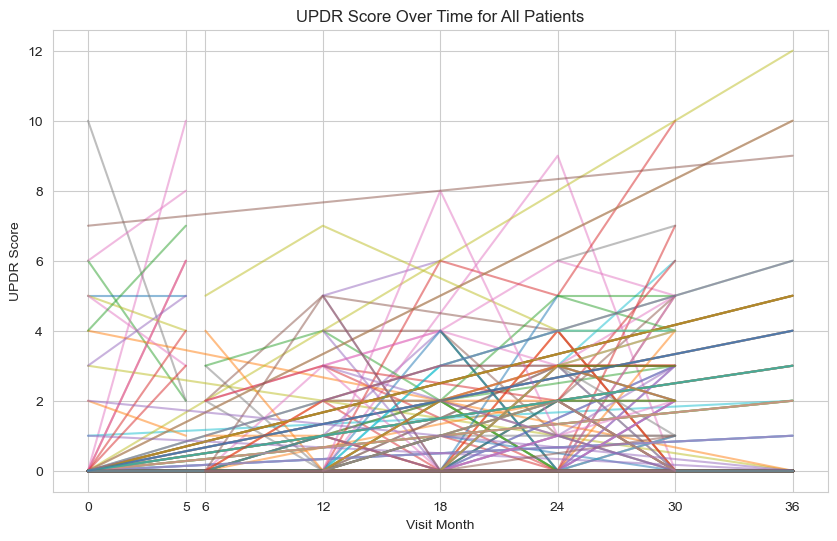

In [135]:
plt.figure(figsize=(10, 6))

for patient_id, row in supplemental_updrs4.iterrows():
    values = row.dropna()
    months =  values.index 
    plt.plot(months, values.values,  alpha=0.5)

plt.xlabel('Visit Month')
plt.ylabel('UPDR Score')
plt.title('UPDR Score Over Time for All Patients')
plt.xticks(supplemental_updrs4.columns)  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()


In [136]:
binary_matrix4 = supplemental_updrs4[supplemental_updrs4.columns].notna().astype(int)
binary_matrix4.shape


(771, 8)

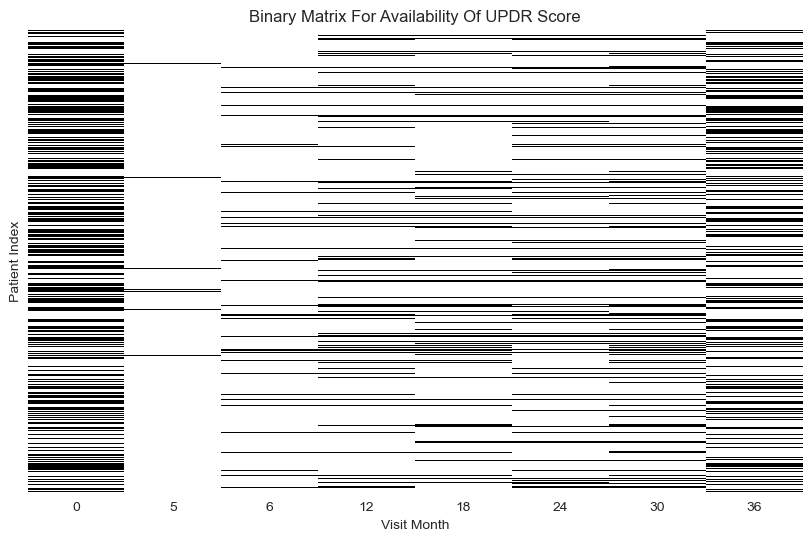

In [137]:
plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix4, cmap='Greys', cbar=False)
plt.xlabel('Visit Month')
plt.ylabel('Patient Index')
plt.title('Binary Matrix For Availability Of UPDR Score')
plt.yticks([],[])  # Set x-axis ticks to actual visit months
plt.grid(True)
plt.show()

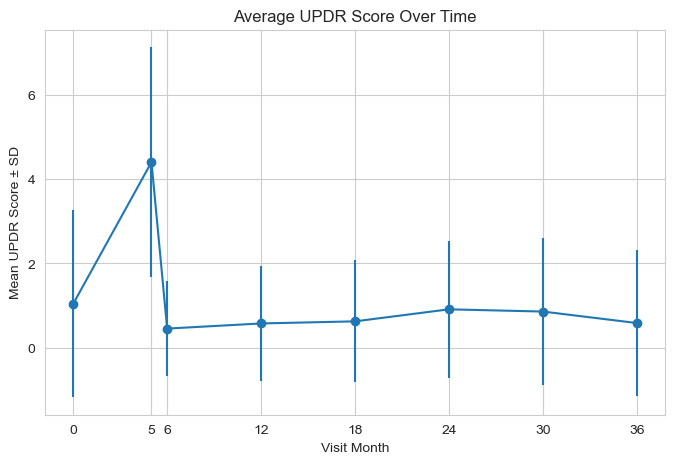

In [138]:
mean_updr_4_score = supplemental_updrs4.mean()
std_updr_4_score = supplemental_updrs4.std()
median_updr_4_score = supplemental_updrs4.median()
visit_months = supplemental_updrs4.columns
plt.figure(figsize=(8, 5))
plt.errorbar(visit_months, mean_updr_4_score, yerr =std_updr_4_score, fmt='-o')
plt.title("Average UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Mean UPDR Score ± SD")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

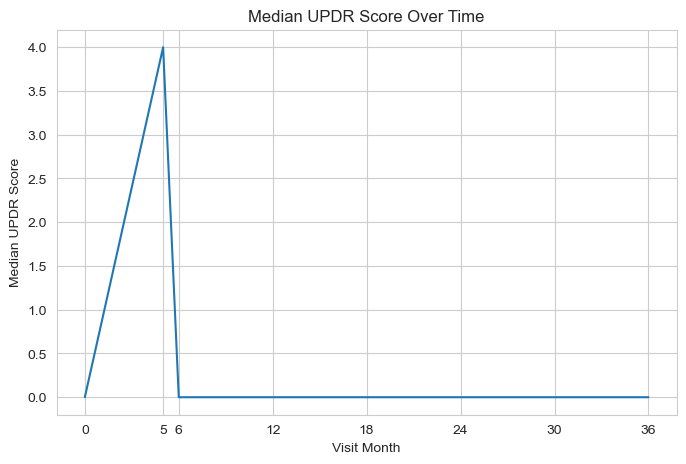

In [139]:
median_updr_4_score = supplemental_updrs4.median()
plt.figure(figsize=(8, 5))
plt.plot(visit_months, median_updr_4_score )
plt.title("Median UPDR Score Over Time")
plt.xlabel("Visit Month")
plt.ylabel("Median UPDR Score")
plt.xticks(visit_months)
plt.grid(True)
plt.show()

In [140]:
summary = supplemental_updrs4.describe().T
print(summary)

             count      mean       std  min  25%  50%  75%   max
visit_month                                                     
0            382.0  1.044503  2.212019  0.0  0.0  0.0  0.0  12.0
5             15.0  4.400000  2.720294  0.0  2.5  4.0  6.0  10.0
6             59.0  0.457627  1.119144  0.0  0.0  0.0  0.0   5.0
12           126.0  0.579365  1.364423  0.0  0.0  0.0  0.0   7.0
18           124.0  0.629032  1.445305  0.0  0.0  0.0  0.0   8.0
24           151.0  0.913907  1.628662  0.0  0.0  0.0  2.0   9.0
30           180.0  0.861111  1.732902  0.0  0.0  0.0  1.0  10.0
36           258.0  0.589147  1.726932  0.0  0.0  0.0  0.0  12.0
